# Harmonic Analysis 
- Discrete Fourier Transform

In [2]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt  

(678, 768, 3)

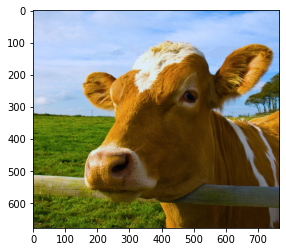

In [3]:
im = cv2.imread('pixels/cow.jpg')[:,:,::-1]
plt.imshow(im);
im.shape

(768,)


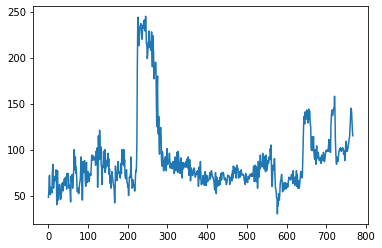

In [4]:
signal = im[400,:,0]  # a 1D signal for experiments
print(signal.shape)
plt.plot(signal); 

Fourier basis is orthogonal.
1. $F_k$ is an N dimensional vector:
$$
    F_k[n] = \exp{i \frac{ 2\pi k}{N}n}, \quad n=0,...,N-1
$$
2. $k/N$ is actually a frequency. 
    - if $k=1$, then $F_1$ oscillates only once during $[0, N-1]$.
3. its inverse $N/k$ is the period. 
    - if $k=1$ then the peak-to-peak duration is $N$; 
    - if $k=2$ then the duration is $N/2$, and it oscillates twice in [0, N-1].
4. $F_k$ and $F_j$ are orthogoanl: $F_k \cdot F_j = 0$ if $k \neq j$

---
A small example.

In [5]:
N = 16 # signal length
periods = np.arange(N)
fbasis = []
for k in periods: # given frequency
    basis = []
    f = k / N #1./p if p != 0 else 0 
    for n in range(N): # time/space index 
        x = np.cos(n * np.pi * 2 * f)
        y = np.sin(n * np.pi * 2 * f)
        basis.append(x + y* 1j) # complex number
    fbasis.append(basis)
fbasis = np.array(fbasis)

[1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j
 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]


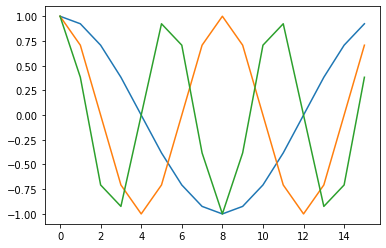

In [6]:
f0 = fbasis[0]; print(f0)  # the first is simply 1s.
f1 = fbasis[1]; plt.plot(f1.real) # one cycle signal
f2 = fbasis[2]; plt.plot(f2.real); # 2 cycle signal
f3 = fbasis[3]; plt.plot(f3.real); # 2 cycle signal

In [7]:
f = fbasis[2]
print(f[0].real, f[0].imag, "  ", f[1].real, f[1].imag)
fn = fbasis[2] / np.sqrt(N)
N, (f.conj() * f).sum() , (fn.conj() * fn).sum(), np.vdot(fn, fn), np.dot(fn, fn)

1.0 0.0    0.7071067811865476 0.7071067811865476


(16, (16+0j), (1+0j), (1+0j), (-3.885780586188048e-16+3.0616169978683824e-17j))

**numpy.vdot(a, b, /)**

Return the dot product of two vectors.

The vdot(a, b) function handles complex numbers differently than dot(a, b). If the first argument is complex the complex conjugate of the first argument is used for the calculation of the dot product.

In [8]:
# example with a small N
N = 16 # signal length
periods = np.arange(N)
fbasis = []
for k in periods: # given frequency
    basis = []
    f = k / N #1./p if p != 0 else 0 
    for n in range(N): # time/space index 
        x = np.cos(n * np.pi * 2 * f)
        y = np.sin(n * np.pi * 2 * f)
        basis.append(x + y* 1j) # complex number
    fbasis.append(basis)
fbasis = np.array(fbasis) / np.sqrt(N)  # np.sqrt(N) is for magnitude scaling

In [9]:
f1 = fbasis[1]
(f1.conj() * f1 ).sum()

(1+0j)

In [10]:
for i in range(1, 4):
    for j in range(1, 4):
        vdot = np.vdot(fbasis[i], fbasis[j])
        print(i, j, vdot, np.abs(vdot))  

1 1 (1+0j) 1.0
1 2 (-3.8565756653963063e-17+1.0564336571314671e-17j) 3.9986532651440444e-17
1 3 (4.85722573273506e-17-6.938893903907228e-17j) 8.469999434971913e-17
2 1 (-3.8565756653963063e-17-1.0564336571314671e-17j) 3.9986532651440444e-17
2 2 (1+0j) 1.0
2 3 (-9.43249142437475e-17+2.0194908179109047e-18j) 9.434653035620307e-17
3 1 (4.85722573273506e-17+6.938893903907228e-17j) 8.469999434971913e-17
3 2 (-9.43249142437475e-17-2.0194908179109047e-18j) 9.434653035620307e-17
3 3 (1+0j) 1.0


In [11]:
s = 0
for i in range(f1.shape[0]):
    s += f1[i] * f1[i]
print('s: ', s, np.sum(f1 * f1), ' which is not 1')
print('simple dot: ', np.dot(f1, f1), 'which is not what we want.')

s:  (2.0816681711721685e-17+4.85722573273506e-17j) (2.0816681711721685e-17+1.5308084989341912e-17j)  which is not 1
simple dot:  -2.7755575615628914e-17j which is not what we want.


**numpy.matrix.H**

Returns the (complex) conjugate transpose of self.

In [12]:
I = fbasis.conj().T @ fbasis  # this must be identity matrix of dim N x N
II = fbasis @ fbasis.conj().T
print(np.abs(I).sum(), np.abs(II).sum()) # 

16.000000000000128 16.000000000000128


---

In [13]:
N = 768 # signal length
periods = np.arange(N)
fbasis = []
for k in periods: # given frequency
    basis = []
    f = k / N #1./p if p != 0 else 0 
    for n in range(N): # time/space index 
        x = np.cos(n * np.pi * 2 * f)
        y = np.sin(n * np.pi * 2 * f)
        basis.append(x + y* 1j) # complex number
    fbasis.append(basis)
fbasis = np.array(fbasis) / np.sqrt(N)  # np.sqrt(N) is for magnitude scaling

Now we have $N$ vectors of size $N$.

In [14]:
fbasis.shape 

(768, 768)

Check orthogonality

In [15]:
for i in range(N):  # mag = 1
    r = np.vdot(fbasis[i], fbasis[i])
    m = np.absolute(r)
    if np.abs(1-m) > 1E-11:
        print(i, r)

for i in range(N): # orthogonal
    for j in range(i+1, N):
        r = np.vdot(fbasis[i], fbasis[j])
        if np.absolute(r) > 1E-11:
            print(i, j, r)
print('orthognality check, finished.')

orthognality check, finished.


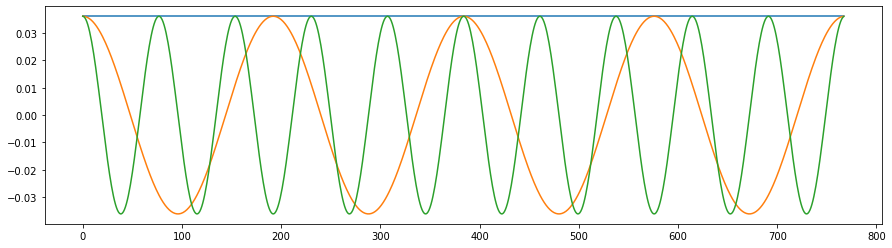

In [16]:
plt.figure(figsize=(15,4))
plt.plot(np.real(fbasis[0]))
plt.plot(np.real(fbasis[4]))
plt.plot(np.real(fbasis[10]));

Project `signal` on to the fourier basis.

That is we are going to represent the signal w.r.t the fourier basis vectors:
$$
    s = c_0 F_0 + c_1 F_1 + ... + c_{N-1} F_{N-1} = F c
$$
How can we compute $c_i$? By inner product based on the orthogonality
$$
    c_i = F_i \cdot s = F_i^H s \\
    c = F^H s
$$
where $F^H$ is the complex conjugate transpose.

In [17]:
c = fbasis.conj().T @ signal

In [18]:
fsignal = c  # rename

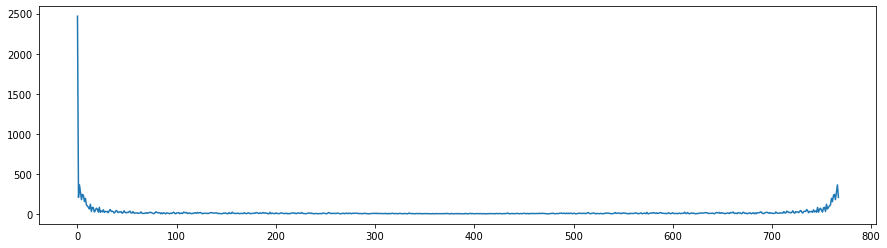

In [19]:
mag = np.absolute(fsignal)
plt.figure(figsize=(15,4))
plt.plot(mag);

Reconstruction of the original signal.
$$
    c = F^H s \\
    F c = F F^H s \\
    F c = s
$$

In [20]:
rec = fbasis @ fsignal
r = np.real(rec)
i = np.imag(rec) 
# RMS
serr = rec - signal
print(serr.dtype)
rms = np.abs(serr).sum()
print('reconstruction rms = ', rms)

complex128
reconstruction rms =  7.472576980875268e-09


Even symmetry of $c$, the DFT of $s$:

- $c_k$ is symmetric with period $N$: 
$$c_k = c_{k+N} = c_{k-N} = ..$$
- Input signal $s$ is real and $c$ is **even** symmetric: $c^*_{-k} = c_k$
$$  
  c_k = F_k^H \cdot s   = \sum_n s[n] \cdot \exp \left[-i\frac{2\pi k}{N} n\right] \\
  c^*_{-k} = \sum_n s[n] \cdot \exp \left[i\frac{2\pi (-k)}{N} n\right] = c_k
$$

- For even $N$, 
    1. $c_0$ and $c_{N/2}$ are real-valued, 
       - $k=0$: $c_0$ is a real number since $e^{-\frac{2\pi}{N}k}$ with $k=0$ is $1$. 
       - $k=N/2$: $c_{N/2}$ is real because $e^{-\frac{2\pi}{N}k} = -1$, so is $F_{-N/2}$.
    2. and the remainder of the DFT is completely specified by just $N/2-1$ complex numbers.
   
- Because of this even symmetry, we use the interval $[-N/2, N/2-1]$ by putting $k=0$ at the center.

In [21]:
fsignal[-1], fsignal[1]

((-24.861020819685166+204.83772987118542j),
 (-24.86102081966823-204.8377298711797j))

In [22]:
fsignal[N//2 - 1], fsignal[N//2], fsignal[N//2 + 1]

((-0.7534342011452669+1.3135436710614303j),
 (5.412658773652748+5.326352466318047e-12j),
 (-0.7534342011466921-1.3135436710642612j))

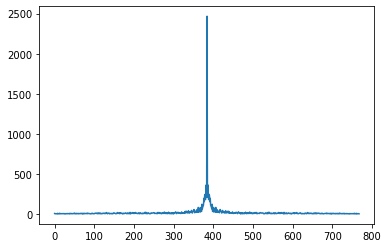

In [23]:
fs2 = np.empty_like(fsignal)
fs2[N//2:] = fsignal[:N//2]
fs2[:N//2] = fsignal[N//2:]
plt.plot(np.absolute(fs2));

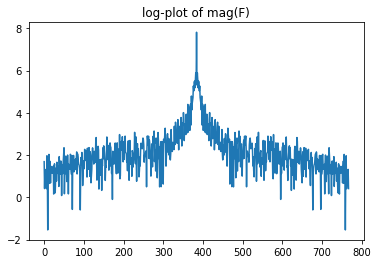

In [24]:
plt.plot(np.log(np.absolute(fs2)));
plt.title('log-plot of mag(F)');

Smoothing by removing high frequency terms.

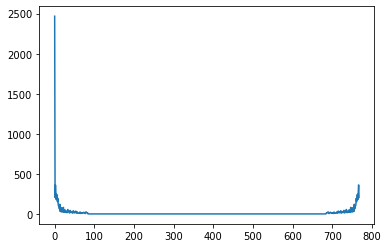

In [25]:
width2 = 300
interval = range(N//2-width2,N//2+width2)
fprocessed = fsignal.copy() 
fprocessed[interval] = 0
plt.plot(np.absolute(fprocessed));

reconstruction rms =  7.226494059659527


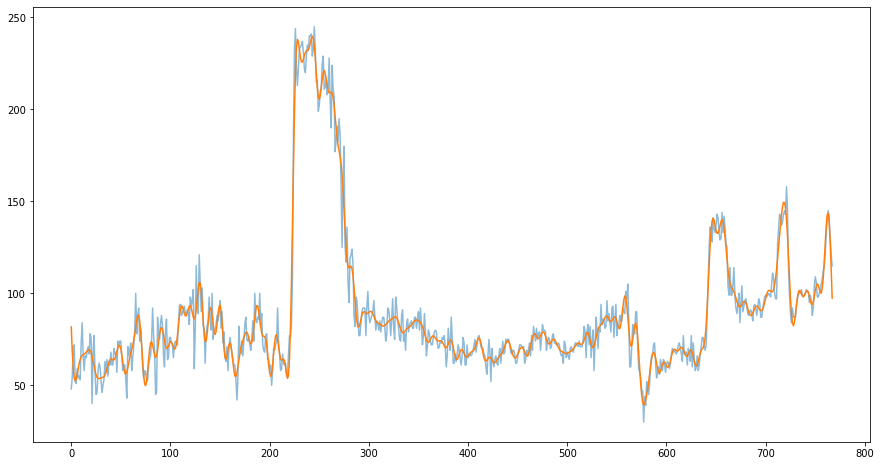

In [26]:
rec = fbasis @ fprocessed
r = np.real(rec)
i = np.imag(rec) 
err = np.sqrt( ((r - signal)**2).mean() )

plt.figure(figsize=(15,8))
plt.plot(signal, alpha=0.5)
plt.plot(r)
print('reconstruction rms = ', err)

Reconstruction with various window size.

reconstruction rms =  37.88580582278602 window = 766 n_terms=2
reconstruction rms =  17.16344626652155 window = 748 n_terms=20
reconstruction rms =  12.662760552858742 window = 728 n_terms=40
reconstruction rms =  8.659547892462994 window = 668 n_terms=100


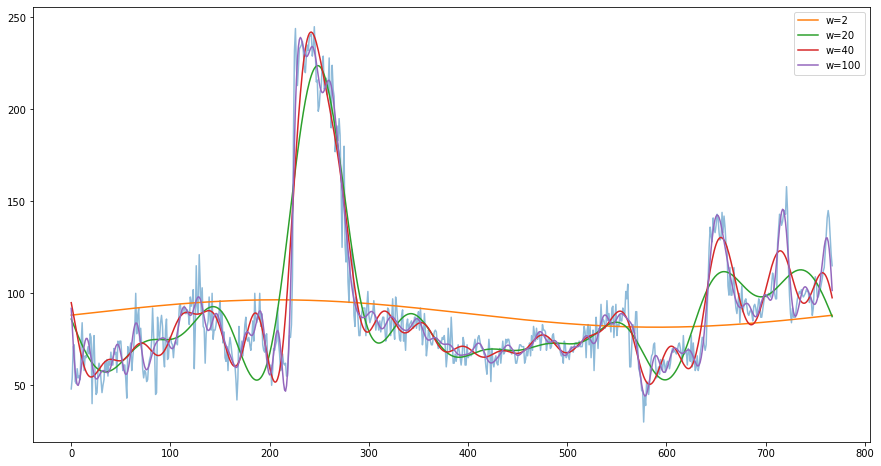

In [27]:
plt.figure(figsize=(15,8))
plt.plot(signal, alpha=0.5)

width2values = [N//2-1, N//2-10, N//2-20, N//2-50]
for width2 in width2values:
    interval = range(N//2-width2,N//2+width2)
    fprocessed = fsignal.copy() 
    fprocessed[interval] = 0

    rec = fbasis @ fprocessed
    r = np.real(rec)
    i = np.imag(rec) 
    err = np.sqrt( ((r - signal)**2).mean() )

    plt.plot(r, label=f'w={N-2*width2}')
    print('reconstruction rms = ', err, f'window = {2*width2}', f'n_terms={N-2*width2}')
plt.legend()

reconstruction rms =  37.88580582278602 window = 766 n_terms=2
reconstruction rms =  33.93693622265716 window = 764 n_terms=4
reconstruction rms =  30.468599988164264 window = 762 n_terms=6
reconstruction rms =  26.133054942084936 window = 758 n_terms=10
reconstruction rms =  17.16344626652155 window = 748 n_terms=20


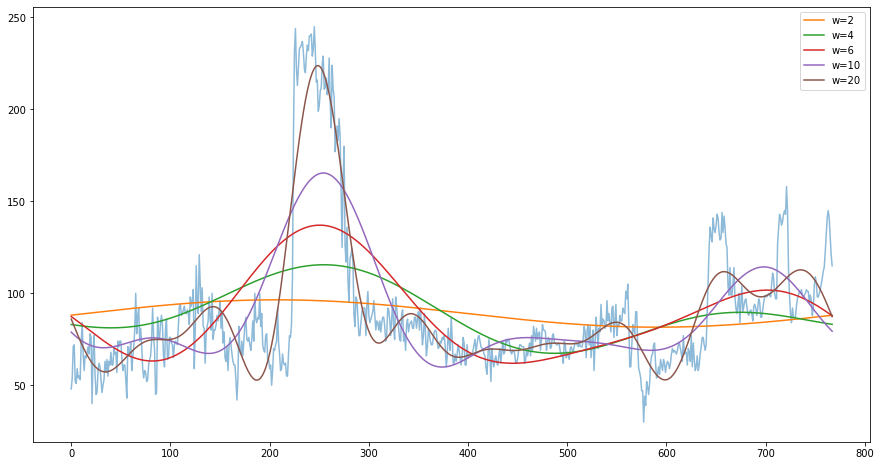

In [28]:
plt.figure(figsize=(15,8))
plt.plot(signal, alpha=0.5)

width2values = [N//2-1, N//2-2, N//2-3, N//2-5, N//2-10]
for width2 in width2values:
    interval = range(N//2-width2,N//2+width2)
    fprocessed = fsignal.copy() 
    fprocessed[interval] = 0

    rec = fbasis @ fprocessed
    r = np.real(rec)
    i = np.imag(rec) 
    err = np.sqrt( ((r - signal)**2).mean() )

    plt.plot(r, label=f'w={N-2*width2}')
    print('reconstruction rms = ', err, f'window = {2*width2}', f'n_terms={N-2*width2}')
plt.legend()

FFT with numpy

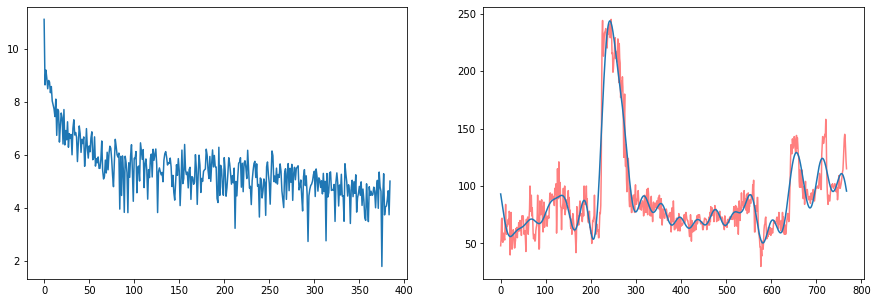

In [29]:
rft = np.fft.rfft(signal)
rftcopy = rft.copy()
rft[20:] = 1e-10 # remove high frequency terms
smooth = np.fft.irfft(rft)

fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(np.log(np.absolute(rftcopy)))
axes[1].plot(signal, alpha=0.5, color='red')
axes[1].plot(smooth);


## 2D Discrete Fourier Transform

Reconstruction Error RMS:  2.1522401700130885e-16


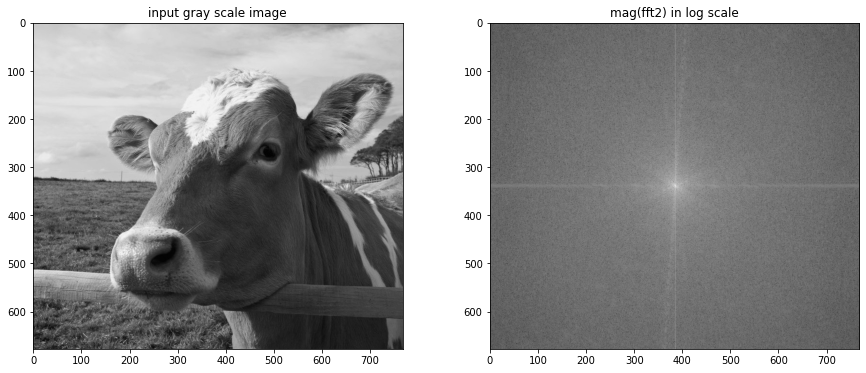

In [30]:
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) / 255
fft2 = np.fft.fft2(gray)
rec = np.fft.ifft2(fft2)

rms = np.sqrt(np.power(np.abs(gray-rec),2).mean())
print('Reconstruction Error RMS: ', rms)

# display 
fft2shift = np.fft.fftshift(fft2) # shift to center
m = np.abs(fft2shift)
fig, axes = plt.subplots(1,2, figsize=(15,6))
axes[0].imshow(gray, cmap='gray'); axes[0].set(title='input gray scale image')
axes[1].imshow(np.log10(m), cmap='gray'); axes[1].set(title='mag(fft2) in log scale');

https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html

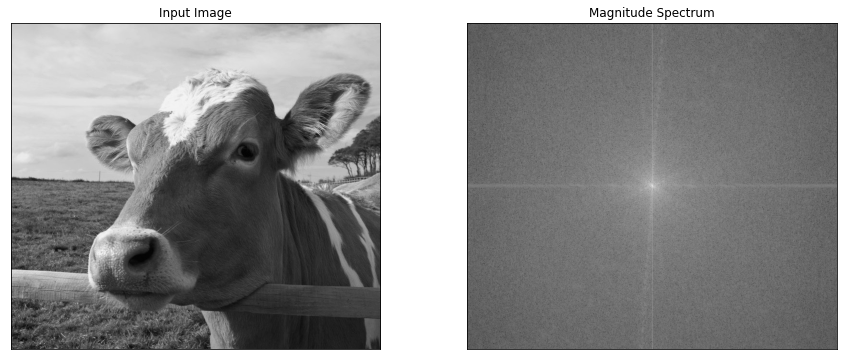

In [31]:
img = gray
dft = cv2.dft(img.astype(np.float32), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.figure(figsize=(15,6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]);

## Low Pass Filtering

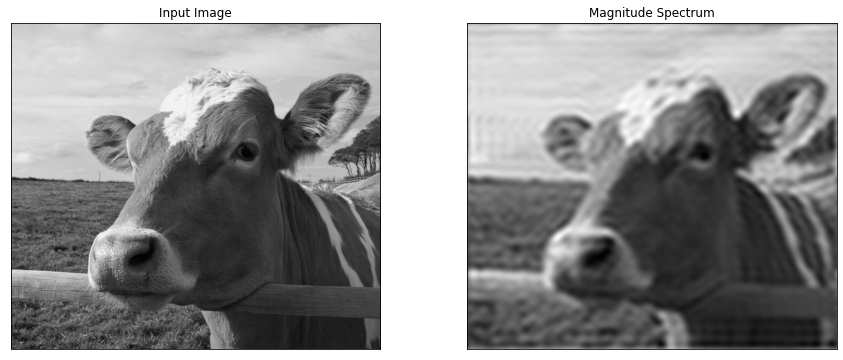

In [40]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(15,6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]) ;

## High Pass Filtering

0.0 0.0


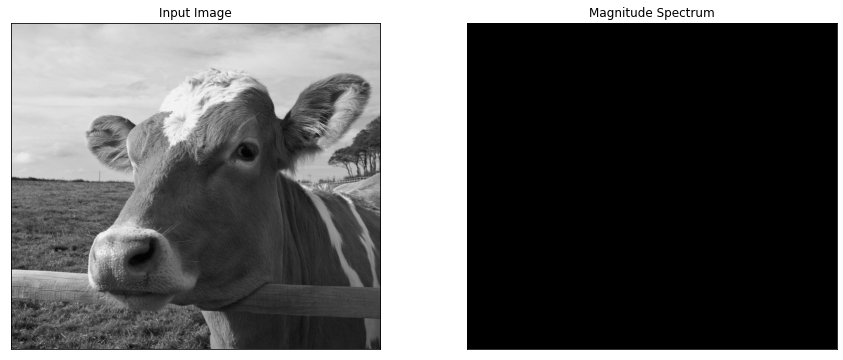

In [39]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
print(img_back.min(), img_back.max())

plt.figure(figsize=(15,6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]) ;

(678, 768) -0.448885722346288 0.618472656996106


(Text(0.5, 1.0, 'Result ABS'), ([], []), ([], []))

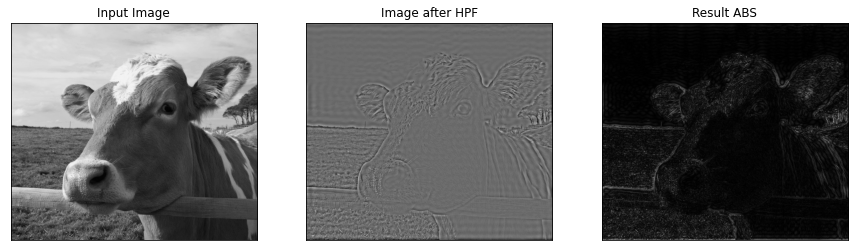

In [50]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
print(img_back.shape, img_back.min(), img_back.max())
img_back_abs = np.abs(img_back)  # 

plt.figure(figsize=(15,6))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back_abs, cmap='gray')
plt.title('Result ABS'), plt.xticks([]), plt.yticks([])

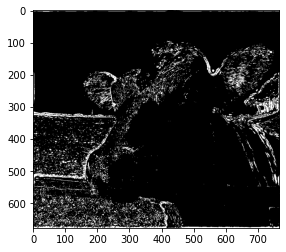

In [55]:
binary = img_back_abs > 0.1
plt.imshow(binary, cmap='gray')

End.